# Section 2.1
# Gradient Descent

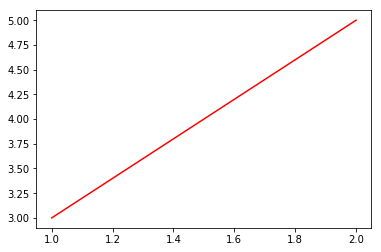

[ 1.002  1.002]
[ 1.003991  1.003991]
[ 1.00597304  1.00597304]
[ 1.00794616  1.00794616]
[ 1.0099104  1.0099104]
[ 1.01186581  1.01186581]
[ 1.01381241  1.01381241]
[ 1.01575026  1.01575026]
[ 1.01767938  1.01767938]
[ 1.01959982  1.01959982]
[ 1.02151162  1.02151162]
[ 1.02341482  1.02341482]
[ 1.02530945  1.02530945]
[ 1.02719556  1.02719556]
[ 1.02907318  1.02907318]
[ 1.03094235  1.03094235]
[ 1.03280311  1.03280311]
[ 1.0346555  1.0346555]
[ 1.03649955  1.03649955]
[ 1.0383353  1.0383353]
[ 1.04016279  1.04016279]
[ 1.04198206  1.04198206]
[ 1.04379314  1.04379314]
[ 1.04559607  1.04559607]
[ 1.04739089  1.04739089]
[ 1.04917763  1.04917763]
[ 1.05095633  1.05095633]
[ 1.05272703  1.05272703]
[ 1.05448975  1.05448975]
[ 1.05624455  1.05624455]
[ 1.05799145  1.05799145]
[ 1.05973049  1.05973049]
[ 1.0614617  1.0614617]
[ 1.06318512  1.06318512]
[ 1.06490079  1.06490079]
[ 1.06660874  1.06660874]
[ 1.068309  1.068309]
[ 1.07000161  1.07000161]
[ 1.0716866  1.0716866]
[ 1.07336401  

In [117]:
import numpy as np
import matplotlib.pyplot as plt

def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y 
        cost = np.sum(loss ** 2) / (2 * m)
        #print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m 
        # update
        theta = theta - alpha * gradient
        print(theta)
    return theta

x = np.array([1,2])
y= np.array([3,5])
y=y.transpose()

plt.plot(x,y,"r") 
plt.show()

theta=([1,1])
theta_grad= gradientDescent(x,y,theta,alpha=0.001,m=2,numIterations=100)

print("The computed value of Theta:",theta_grad)

checker= np.array([1,2])
basisVector = np.dot(theta_grad, checker.transpose())
print(basisVector)

### Multivariate Gradient Descent

In [118]:
x = np.matrix([[1,2], [3, 4]])
y= np.matrix([3, 5])
y=y.transpose()
plt.plot(x,y,"r") 
#plt.show()

theta=([1,1])
theta_grad= gradientDescent(x,y,theta,alpha=0.001,m=2,numIterations=100)

print("The computed value of Theta:",theta_grad)

checker= np.array([1,2])
basisVector = np.dot(theta_grad, checker.transpose())
print(basisVector)

[[ 1.003  0.995]
 [ 1.004  0.992]]
[[ 0.999957  0.992081]
 [ 0.999939  0.988115]]
[[ 0.99695764  0.98920379]
 [ 0.99593991  0.98428928]]
[[ 0.99400127  0.98636775]
 [ 0.99200181  0.98052196]]
[[ 0.99108726  0.98357225]
 [ 0.98812378  0.97681217]]
[[ 0.98821495  0.98081671]
 [ 0.98430493  0.97315904]]
[[ 0.98538374  0.97810051]
 [ 0.98054438  0.96956173]]
[[ 0.98259301  0.97542308]
 [ 0.97684125  0.96601941]]
[[ 0.97984216  0.97278382]
 [ 0.97319469  0.96253126]]
[[ 0.97713059  0.97018219]
 [ 0.96960384  0.95909646]]
[[ 0.97445771  0.9676176 ]
 [ 0.96606789  0.95571422]]
[[ 0.97182294  0.96508951]
 [ 0.96258601  0.95238375]]
[[ 0.96922573  0.96259738]
 [ 0.95915739  0.94910429]]
[[ 0.9666655   0.96014066]
 [ 0.95578123  0.94587507]]
[[ 0.9641417   0.95771883]
 [ 0.95245676  0.94269533]]
[[ 0.96165379  0.95533137]
 [ 0.9491832   0.93956434]]
[[ 0.95920124  0.95297776]
 [ 0.94595979  0.93648138]]
[[ 0.95678352  0.95065751]
 [ 0.94278579  0.93344572]]
[[ 0.9544001   0.9483701 ]
 [ 0.939660

### Stochastic Gradient Descent

For more details: http://scikit-learn.org/stable/modules/sgd.html

# Section 2.2
# Section 2.2.1
# Single Variable Linear Regression

### Import Necessary Libraries:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Load the diabetes dataset

In [3]:
diabetes = datasets.load_diabetes()

### Lets Take a look at the dataset:

In [4]:
print(diabetes)
print(type(diabetes))

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
        310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
         97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
         85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
        265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,
         53.,  1

### Use only one feature

In [5]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

### Split the data into training/testing sets

In [6]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

print(diabetes_X_train, diabetes_X_test)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

### Split the targets into training/testing sets

In [8]:
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

print(diabetes_y_train)


[ 151.   75.  141.  206.  135.   97.  138.   63.  110.  310.  101.   69.
  179.  185.  118.  171.  166.  144.   97.  168.   68.   49.   68.  245.
  184.  202.  137.   85.  131.  283.  129.   59.  341.   87.   65.  102.
  265.  276.  252.   90.  100.   55.   61.   92.  259.   53.  190.  142.
   75.  142.  155.  225.   59.  104.  182.  128.   52.   37.  170.  170.
   61.  144.   52.  128.   71.  163.  150.   97.  160.  178.   48.  270.
  202.  111.   85.   42.  170.  200.  252.  113.  143.   51.   52.  210.
   65.  141.   55.  134.   42.  111.   98.  164.   48.   96.   90.  162.
  150.  279.   92.   83.  128.  102.  302.  198.   95.   53.  134.  144.
  232.   81.  104.   59.  246.  297.  258.  229.  275.  281.  179.  200.
  200.  173.  180.   84.  121.  161.   99.  109.  115.  268.  274.  158.
  107.   83.  103.  272.   85.  280.  336.  281.  118.  317.  235.   60.
  174.  259.  178.  128.   96.  126.  288.   88.  292.   71.  197.  186.
   25.   84.   96.  195.   53.  217.  172.  131.  2

### Create linear regression object

In [11]:
regr = linear_model.LinearRegression()

### Train the model using the training sets

In [12]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Make predictions using the testing set

In [13]:
diabetes_y_pred = regr.predict(diabetes_X_test)
#print(diabetes_X_test)
print(diabetes_y_pred)
print(diabetes_y_test)

[[ 0.07786339]
 [-0.03961813]
 [ 0.01103904]
 [-0.04069594]
 [-0.03422907]
 [ 0.00564998]
 [ 0.08864151]
 [-0.03315126]
 [-0.05686312]
 [-0.03099563]
 [ 0.05522933]
 [-0.06009656]
 [ 0.00133873]
 [-0.02345095]
 [-0.07410811]
 [ 0.01966154]
 [-0.01590626]
 [-0.01590626]
 [ 0.03906215]
 [-0.0730303 ]]
[ 225.9732401   115.74763374  163.27610621  114.73638965  120.80385422
  158.21988574  236.08568105  121.81509832   99.56772822  123.83758651
  204.73711411   96.53399594  154.17490936  130.91629517   83.3878227
  171.36605897  137.99500384  137.99500384  189.56845268   84.3990668 ]
[ 233.   91.  111.  152.  120.   67.  310.   94.  183.   66.  173.   72.
   49.   64.   48.  178.  104.  132.  220.   57.]


### The coefficients

In [128]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 938.23786125]


### The mean squared error

In [14]:
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Mean squared error: 2548.07


### Explained variance score: 1 is perfect prediction

In [15]:
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Variance score: 0.47


### Plot outputs

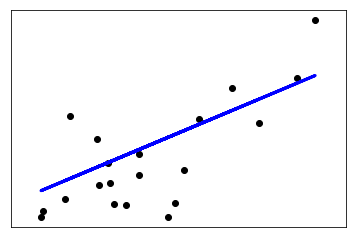

In [16]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Section 2.2.2
# Multivariate Linear Regression

### Importing necessary Libraries

In [27]:
import pandas as pd
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier

### Loading Dataset from CSV Files

In [28]:
dataTrain = pd.read_csv("dataTrain.csv")
dataTest = pd.read_csv("dataTest.csv")

### Lets Take a Look at the Training Set:

In [29]:
dataTrain

,Temperature(K),Pressure(ATM),CompressibilityFactor(Z)
0,303.230,23.434,0.725550
1,313.345,26.435,0.752416
2,323.345,29.344,0.778906
3,383.345,25.876,0.912745
4,393.678,28.344,0.939472
5,363.678,27.843,0.869871
6,373.789,26.567,0.891595
7,273.100,24.675,0.806677
8,313.100,24.675,0.888395


### The Test Set:

In [30]:
dataTest

,Temperature(K),Pressure(ATM),CompressibilityFactor(Z)
0,333.123,27.343,0.798995
1,343.670,25.343,0.820853
2,353.340,29.343,0.847894
3,373.789,26.567,0.891595


### Defining the Train & Test Set

In [31]:
x_train = dataTrain[['Temperature(K)', 'Pressure(ATM)']]#.reshape(-1,2)
#x_train = x_train_df.values
#x_train = x_train.reshape(-1,2)
y_train = dataTrain['CompressibilityFactor(Z)']
#y_train = y_train_df.values
x_test = dataTest[['Temperature(K)', 'Pressure(ATM)']]#.reshape(-1,2)
y_test = dataTest['CompressibilityFactor(Z)']
print(x_train[:,:2])
#plt.plot(y_train, y_train)
#plt.show()

0    0.798995
1    0.820853
2    0.847894
3    0.891595
Name: CompressibilityFactor(Z), dtype: float64


### Defining and Training The Model

In [35]:
clf_linear = linear_model.LinearRegression()
model = clf_linear.fit(x_train, y_train)

TypeError: unhashable type: 'slice'

### Predicting Values for the Test Set

In [23]:
print (model.predict(x_test))

[ 0.8268747   0.85623869  0.84524919  0.8950218 ]


# Section 2.3
# Support Vector Machines

Reference to the SVM Algorithm: https://www.youtube.com/watch?v=1NxnPkZM9bc

## Section 2.3.1
## The Iris Dataset:

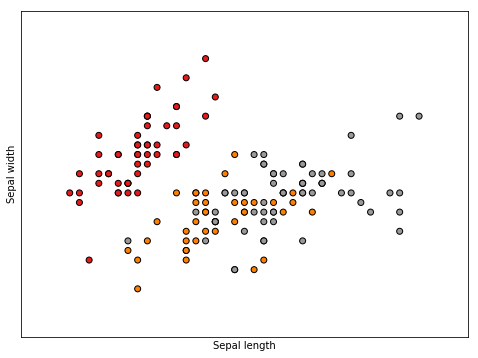

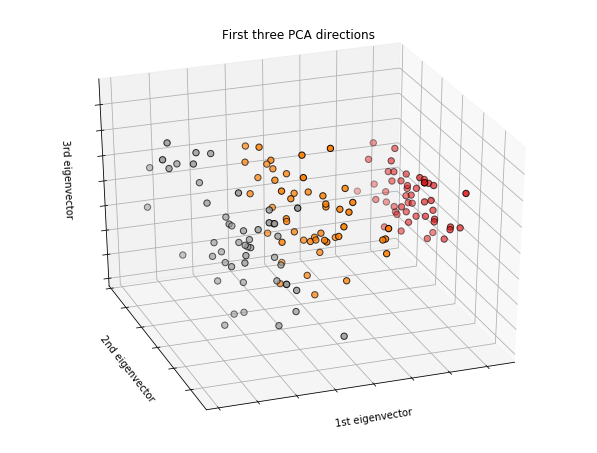

In [36]:

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## Section 2.3.2
## Effect of Different Kernels:

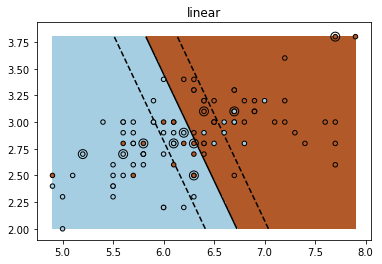

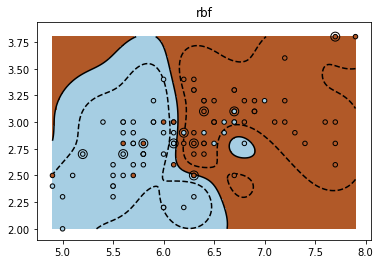

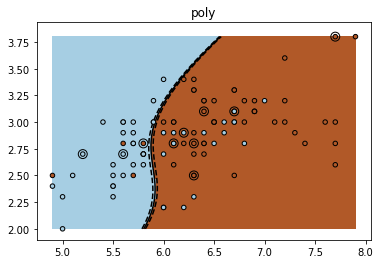

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

## Section 2.3.3
## Support Vector Machine Classification

### Importing necessary Functions

In [52]:
from sklearn import datasets
from sklearn import cross_validation
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

### Loading the Iris Dataset

In [53]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :]  # we only take the first two features.
y = iris.target

### Lets take a look at the Data

In [54]:
print(X)
print(y)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

### Splitting the Data into Train and Test Set

In [55]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

### Defining the Classifier

In [56]:
clf = svm.SVC(kernel = 'poly')
clf2 = DecisionTreeClassifier()

### Training and Testing the Output of the Network:

In [59]:
clf2.fit(X_train, y_train)

accuracy= clf2.score(X_test, y_test)
print("The accuracy of the network is:", accuracy)
print("Prediction for the Test set is:")
print( clf2.predict(X_test) )
print("Lets Compare it to the original target test set:")
print(y_test)

The accuracy of the network is: 0.888888888889
Prediction for the Test set is:
[1 1 2 0 1 1 1 2 2 2 1 2 0 2 2 1 0 2 0 0 2 1 2 2 2 1 1 2 2 2 1 1 0 0 1 0 0
 0 0 1 2 2 1 2 2]
Lets Compare it to the original target test set:
[1 1 2 0 1 1 1 1 1 2 1 2 0 2 2 1 0 2 0 0 2 1 2 2 2 1 1 2 1 2 1 2 0 0 1 0 0
 0 0 1 2 2 2 2 2]


## Section 2.3.4
## Support Vector Machine Regression:

In [60]:
from sklearn import datasets
from sklearn import cross_validation
from sklearn import svm

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

clf = svm.SVR(kernel = 'poly')

clf.fit(X_train, y_train)

accuracy= clf.score(X_test, y_test)
print("The accuracy of the network is:", accuracy)
print("Prediction for the Test set is:")
print( clf.predict(X_test) )
print("Lets Compare it to the original target test set:")
print(y_test)

The accuracy of the network is: 0.696739623366
Prediction for the Test set is:
[-0.0204929   1.61661104  1.048255    0.90288835  1.49100305  0.97278298
  1.62585612  0.98242128  1.75642441  0.38406668 -0.0972976   1.14896607
  1.72318277 -0.00752492  0.24598515  1.90101936  1.07326292  1.6743113
  0.90420528  1.49373402  1.13377703  1.47107572  2.12885215  1.07326292
  0.01108733  0.03235055  1.59444655  1.59051977  0.77740067  0.05657552
  1.19566132  1.18030145 -0.09455082  1.04902544  1.36932752  0.14593852
  2.12495196 -0.04438248  2.0606861   0.82197322  1.15934782  1.2316389
  0.24598515  0.19673422  1.12386405]
Lets Compare it to the original target test set:
[0 2 1 1 2 2 1 1 1 0 0 2 2 0 0 1 2 1 1 2 1 2 2 1 0 0 2 2 1 0 1 1 0 1 2 0 2
 0 2 1 2 1 0 0 2]


# Section 2.4
# Using Different Classification Methods
## Section 2.4.1
## Linear Regression:

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn import cross_validation

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

clf = LinearRegression()

clf.fit(X_train, y_train)

accuracy= clf.score(X_test, y_test)
print("The accuracy of the network is:", accuracy)
print("Prediction for the Test set is:")
print( clf.predict(X_test) )
print("Lets Compare it to the original target test set:")
print(y_test)

The accuracy of the network is: 0.72706410869
Prediction for the Test set is:
[ 0.79609455 -0.16604053  0.36920576 -0.3209282   1.658762    0.0279296
 -0.03128126  1.0756773   1.2620658   0.20673647  1.01019307  1.22050077
  2.0076198  -0.05520046  0.16517144  1.57942276  1.54164855  1.40688927
  2.79343058  0.84772377  0.22059148  0.94470884 -0.18995974  0.02034797
  2.66246211  1.06182229  1.22429159 -0.08670129  2.53149365  1.94840895
  1.68647202  1.69653622  1.48622851  2.0655224   0.44475419  1.2620658
  1.83129549  0.93085383  0.12739723 -0.05520046  1.63105198  1.70660041
  0.16896225  1.8791339   1.86527889]
Lets Compare it to the original target test set:
[1 0 0 0 1 0 0 1 2 0 1 2 2 0 0 2 2 1 2 1 0 1 0 0 2 1 1 0 2 1 2 2 2 2 0 1 1
 1 0 0 2 2 0 1 1]


In [62]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

NameError: name 'KNeighborsClassifier' is not defined

## Section 2.4.2
## Random Forest Classification:

reference: Random Forest: https://www.youtube.com/watch?v=loNcrMjYh64


reference: ensemble methods: http://scikit-learn.org/stable/modules/ensemble.html

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import cross_validation

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
clf.fit(X_train, y_train)

accuracy= clf.score(X_test, y_test)
print("The accuracy of the network is:", accuracy)
print("Prediction for the Test set is:")
print( clf.predict(X_test) )
print("Lets Compare it to the original target test set:")
print(y_test)

The accuracy of the network is: 0.711111111111
Prediction for the Test set is:
[0 0 2 2 2 2 2 1 2 1 0 2 2 0 2 1 2 2 2 1 0 2 1 1 2 2 2 2 0 1 0 2 0 0 1 0 2
 1 0 0 2 2 1 0 2]
Lets Compare it to the original target test set:
[0 0 1 2 1 1 2 1 2 1 0 2 1 0 1 1 2 1 2 1 0 1 2 0 2 2 2 2 0 1 0 2 0 0 1 0 1
 1 0 1 1 1 1 0 2]


Random forest Parameters:

The main parameters to adjust when using these methods is n_estimators and max_features. The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees. The latter is the size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias. Empirical good default values are max_features=n_features for regression problems, and max_features=sqrt(n_features) for classification tasks (where n_features is the number of features in the data). Good results are often achieved when setting max_depth=None in combination with min_samples_split=2 (i.e., when fully developing the trees). Bear in mind though that these values are usually not optimal, and might result in models that consume a lot of RAM. 


## Section 2.4.3
## Ada Boost Classifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import cross_validation

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

accuracy= clf.score(X_test, y_test)
print("The accuracy of the network is:", accuracy)
print("Prediction for the Test set is:")
print( clf.predict(X_test) )
print("Lets Compare it to the original target test set:")
print(y_test)

The accuracy of the network is: 0.622222222222
Prediction for the Test set is:
[1 1 1 1 0 0 1 1 0 0 1 0 1 2 1 0 2 1 1 0 0 1 1 1 0 1 2 2 1 1 1 1 1 2 1 1 1
 1 1 2 1 0 1 2 2]
Lets Compare it to the original target test set:
[1 1 1 2 0 0 2 1 0 0 1 0 1 2 1 0 2 1 1 0 0 2 2 1 0 1 0 2 2 2 2 2 2 1 1 1 2
 1 2 1 2 0 1 0 0]


## 2.4.4
## Mulit-Layer Perceptrons/ MLP / ANN (Artificial Neural Network)

Reference: ANN: https://www.youtube.com/watch?v=LCzufhtIFnY

Reference: Scikit-learn : http://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn import cross_validation

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

#clf = MLPClassifier(alpha=1)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_train, y_train)

accuracy= clf.score(X_test, y_test)
print("The accuracy of the network is:", accuracy)
print("Prediction for the Test set is:")
print( clf.predict(X_test) )
print("Lets Compare it to the original target test set:")
print(y_test)

# Section 2.5: Visiting an Example
## Kth Nearest Network implementation using Pima-Indian Dataset

Reference : Pima indian dataset:  https://github.com/LamaHamadeh/Pima-Indians-Diabetes-DataSet-UCI

### important necessary libraries

In [138]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### loading the dataframe

In [139]:

df = pd.read_csv('pima_indians_diabetes.txt')

### defining the columns

In [140]:
 
df.columns =['No_pregnant', 'Plasma_glucose', 'Blood_pres', 'Skin_thick', 
             'Serum_insu', 'BMI', 'Diabetes_func', 'Age', 'Class']

### checking the dataframe

In [141]:
print(df.head())
print(df.dtypes)
print(df.shape)

   No_pregnant  Plasma_glucose  Blood_pres  Skin_thick  Serum_insu   BMI  \
0            1              85          66          29           0  26.6   
1            8             183          64           0           0  23.3   
2            1              89          66          23          94  28.1   
3            0             137          40          35         168  43.1   
4            5             116          74           0           0  25.6   

   Diabetes_func  Age  Class  
0          0.351   31      0  
1          0.672   32      1  
2          0.167   21      0  
3          2.288   33      1  
4          0.201   30      0  
No_pregnant         int64
Plasma_glucose      int64
Blood_pres          int64
Skin_thick          int64
Serum_insu          int64
BMI               float64
Diabetes_func     float64
Age                 int64
Class               int64
dtype: object
(767, 9)


### identify nans ( missing data) 

In [142]:

def num_missing(x):
  return sum(x.isnull())
#Applying per column:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0),'\n') #no nans

Missing values per column:
No_pregnant       0
Plasma_glucose    0
Blood_pres        0
Skin_thick        0
Serum_insu        0
BMI               0
Diabetes_func     0
Age               0
Class             0
dtype: int64 



## Apply the K nearest neighbour classifier

Reference: kNN Algorithm: https://www.youtube.com/watch?v=UqYde-LULfs

Reference: kNN Sklearn : http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

### split the data into training and testing datasets

In [143]:
X = np.array(df.drop(['Class'], axis = 1))
y = np.array(df['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.5,random_state = 7)

### apply the knn method:

this is basically a binary classifier detecting diabetes or not based on the test data

In [147]:
Knn = DecisionTree

### train the data

In [148]:
Knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### test the data

In [149]:
accuracy = Knn.score(X_test, y_test)#this to see how accurate the algorithm is in terms 
#of defining the diabetes to be either 1 or 0
print('accuracy of the model is: ', accuracy) #0.73

accuracy of the model is:  0.739583333333


## Plotting and visualisation (focus on only two features from the dataset)

In [ ]:
X1 = np.array(df[['Plasma_glucose','Age']]) #choose only two features
Y = np.array(df['Class']) #the label of the dataset

h = .02  # step size in the mesh
 
# Create color maps using hex_colors
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

### apply Neighbours Classifier and fit the data.

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split (X1, y, test_size=0.5, random_state = 7)
Knn = KNeighborsClassifier(n_neighbors = 15)
Knn.fit(X1, y)

### Plot the decision boundary. For that, we will assign a color to each (this portion might take a while to run. please be patient) 

In [ ]:

# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X1[:, 0], X1[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Plasma glucose concentration a 2 hours in an oral glucose tolerance test')
plt.ylabel('Age')
plt.title('K = 15')

plt.show()

### The part of code we actually need in a nuthsell:

In [ ]:
#important necessary libraries
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#-------------------

#loading the dataframe
df = pd.read_csv('pima_indians_diabetes.txt')

#-------------------

#defining the columns 
df.columns =['No_pregnant', 'Plasma_glucose', 'Blood_pres', 'Skin_thick', 
             'Serum_insu', 'BMI', 'Diabetes_func', 'Age', 'Class']

X = np.array(df.drop(['Class'], axis = 1))
y = np.array(df['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.5, 
                                                    random_state = 7)
Knn = KNeighborsClassifier(n_neighbors = 2)

#train the data
Knn.fit(X_train,y_train)

accuracy = Knn.score(X_test, y_test)#this to see how accurate the algorithm is in terms 
#of defining the diabetes to be either 1 or 0
print('accuracy of the model is: ', accuracy) #0.73

predictions = Knn.predict(X_test)
print('predictions generated by the knn:')
print(predictions)
print('the actual diabetes ground truth:')
print(y_test)
#ekhane nasim er code hobe 
#filename is model 
#saving model in sklearn
#macine learning mastery .com

In [65]:
import pickle

# Section 2.6
# Visualizing effects of different classifiers:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()